In [1]:
import pandas as pd, seaborn as sns

In [2]:
# load the data
game_data = pd.read_csv("../data/game_stats.csv")
games = pd.read_csv("../data/games.csv")
games

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,venue,home_id,home_team,home_conference,home_points,home_line_scores,home_post_win_prob,away_id,away_team,away_conference,away_points,away_line_scores,away_post_win_prob,excitement_index,highlights,notes
0,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,3953.0,TCF Bank Stadium,135,Minnesota,Big Ten,51.0,"[3, 13, 14, 21]",0.448322,2439,UNLV,Mountain West,23.0,"[6, 7, 3, 7]",0.551678,5.598996,NaN,NaN
1,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,3830.0,Memorial Stadium,84,Indiana,Big Ten,73.0,"[21, 24, 21, 7]",0.999811,282,Indiana State,NaN,35.0,"[7, 14, 7, 7]",0.000189,2.046742,NaN,NaN
2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,3936.0,Spartan Stadium,127,Michigan State,Big Ten,26.0,"[7, 6, 6, 7]",0.962311,2711,Western Michigan,Mid-American,13.0,"[0, 7, 0, 6]",0.037689,4.867190,NaN,NaN
3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,3854.0,Nippert Stadium,2132,Cincinnati,American Athletic,42.0,"[0, 14, 14, 14]",0.995635,2509,Purdue,Big Ten,7.0,"[0, 7, 0, 0]",0.004365,2.774517,NaN,NaN
4,332430275,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,76306.0,347.0,Camp Randall Stadium,275,Wisconsin,Big Ten,45.0,"[10, 7, 21, 7]",0.981694,113,UMass,Mid-American,0.0,"[0, 0, 0, 0]",0.018306,1.924321,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,401282794,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,3953.0,TCF Bank Stadium,135,Minnesota,Big Ten,NaN,NaN,NaN,275,Wisconsin,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN
898,401282785,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,3936.0,Spartan Stadium,127,Michigan State,Big Ten,NaN,NaN,NaN,213,Penn State,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN
899,401282766,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,6577.0,SHI Stadium,164,Rutgers,Big Ten,NaN,NaN,NaN,120,Maryland,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN
900,401282753,2021,13,regular,2021-11-27T05:00:00.000Z,1.0,False,True,NaN,3907.0,Ross-Ade Stadium,2509,Purdue,Big Ten,NaN,NaN,NaN,84,Indiana,Big Ten,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
game_data

,id,home.rushingTDs,home.passingTDs,home.kickReturnYards,home.kickReturnTDs,home.kickReturns,home.kickingPoints,home.interceptionYards,home.interceptionTDs,home.passesIntercepted,home.fumblesRecovered,home.totalFumbles,home.tacklesForLoss,home.defensiveTDs,home.tackles,home.sacks,home.qbHurries,home.passesDeflected,home.firstDowns,home.thirdDownEff,home.fourthDownEff,home.totalYards,home.netPassingYards,home.completionAttempts,home.yardsPerPass,home.rushingYards,home.rushingAttempts,home.yardsPerRushAttempt,home.totalPenaltiesYards,home.turnovers,home.fumblesLost,home.interceptions,home.possessionTime,away.rushingTDs,away.puntReturnYards,away.puntReturnTDs,away.puntReturns,away.passingTDs,away.kickReturnYards,away.kickReturnTDs,away.kickReturns,away.interceptionYards,away.interceptionTDs,away.passesIntercepted,away.fumblesRecovered,away.totalFumbles,away.tacklesForLoss,away.defensiveTDs,away.tackles,away.sacks,away.qbHurries,away.passesDeflected,away.firstDowns,away.thirdDownEff,away.fourthDownEff,away.totalYards,away.netPassingYards,away.completionAttempts,away.yardsPerPass,away.rushingYards,away.rushingAttempts,away.yardsPerRushAttempt,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints
0,401012867,0,1,13.0,0.0,1.0,11.0,13.0,0.0,1.0,1,0.0,5.0,0.0,20.0,2.0,1.0,3.0,22,9-18,3-4,310,86,11-24,3.6,224,52,4.3,0-0,1,0,1,40:55,0.0,-5.0,0.0,1.0,0.0,49.0,0.0,3.0,10.0,0.0,1.0,0,2.0,4.0,0.0,34.0,0.0,0.0,0.0,7,4-10,0-0,115,47,6-16,2.9,68,23,3.0,6-46,2,1,1,19:05,NaN,NaN,NaN,NaN
1,401012810,4,3,14.0,0.0,1.0,7.0,32.0,0.0,3.0,2,0.0,5.0,0.0,35.0,3.0,4.0,3.0,31,3-8,0-0,545,188,13-22,8.5,357,54,6.6,5-50,2,0,2,37:52,2.0,1.0,0.0,2.0,0.0,28.0,0.0,1.0,52.0,0.0,2.0,0,3.0,4.0,0.0,45.0,1.0,0.0,1.0,13,2-12,0-0,300,90,9-21,4.3,210,36,5.8,3-25,5,2,3,22:08,15.0,0.0,1.0,8.0
2,401012884,0,1,28.0,0.0,2.0,1.0,NaN,NaN,NaN,2,1.0,7.0,0.0,33.0,2.0,3.0,4.0,11,0-12,0-1,94,79,7-28,2.8,15,23,0.7,4-40,1,1,0,18:57,1.0,16.0,0.0,3.0,2.0,5.0,0.0,1.0,NaN,NaN,NaN,1,2.0,7.0,0.0,15.0,4.0,4.0,1.0,19,7-18,1-1,395,212,14-25,8.5,183,53,3.5,9-99,2,2,0,40:58,17.0,0.0,2.0,3.0
3,401012857,3,1,19.0,0.0,1.0,4.0,1.0,0.0,1.0,1,3.0,6.0,0.0,51.0,3.0,1.0,2.0,30,9-21,2-3,549,325,34-54,6.0,224,45,5.0,7-55,3,2,1,33:54,3.0,13.0,0.0,3.0,1.0,170.0,0.0,4.0,1.0,0.0,1.0,0,3.0,9.0,0.0,67.0,6.0,1.0,3.0,20,5-15,0-1,417,243,20-37,6.6,174,36,4.8,3-40,1,0,1,26:02,10.0,0.0,3.0,9.0
4,401013332,4,3,32.0,0.0,2.0,9.0,0.0,0.0,1.0,0,2.0,2.0,0.0,40.0,1.0,3.0,7.0,28,8-12,0-0,659,276,25-30,9.2,383,43,8.9,6-43,1,1,0,29:02,3.0,7.0,0.0,1.0,1.0,158.0,0.0,5.0,NaN,NaN,NaN,1,0.0,5.0,0.0,44.0,2.0,0.0,2.0,22,5-14,1-3,474,349,20-36,9.7,125,36,3.5,8-80,1,0,1,30:58,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,333340084,2,6,126.0,0.0,5.0,8.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,16-18,0-0,692,291,26-40,7.3,401,54,7.4,1-5,2,0,2,34:16,1.0,NaN,NaN,NaN,4.0,96.0,0.0,5.0,0.0,0.0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,4-12,2-2,516,485,33-49,9.9,31,16,1.9,6-46,0,0,0,25:44,NaN,NaN,NaN,6.0
841,333410127,1,3,69.0,0.0,3.0,10.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5-15,2-2,438,304,24-40,7.6,134,32,4.2,3-20,1,0,1,32:40,2.0,22.0,0.0,2.0,1.0,70.0,0.0,3.0,1.0,0.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,1-10,0-2,374,101,8-23,4.4,273,40,6.8,5-62,0,0,0,26:46,16.0,0.0,1.0,6.0
842,400547960,4,1,33.0,0.0,2.0,6.0,17.0,0.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,6-12,0-0,338,156,10-18,8.7,182,40,4.6,5-50,1,1,0,28:32,1.0,NaN,NaN,NaN,2.0,40.0,0.0,2.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,8-21,4-5,409,310,32-57,5.4,99,39,2.5,6-28,3,2,1,29:51,57.0,1.0,5.0,2.0
843,400547993,0,5,155.0,0.0,7.0,8.0,9.0,0.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,8-13,0-2,538,532,40-56,9.5,6,

I decided to look at possession time(time elapsed when on offense) and how it relates to point differential. To do this we first have to merge the tables and then conduct analysis

In [19]:
combined_data = games.merge(game_data, left_on="id", right_on="id", validate="one_to_one")
combined_data = combined_data[combined_data['home.possessionTime'].notna()]
combined_data


,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,venue,home_id,home_team,home_conference,home_points,home_line_scores,home_post_win_prob,away_id,away_team,away_conference,away_points,away_line_scores,away_post_win_prob,excitement_index,highlights,notes,home.rushingTDs,home.passingTDs,home.kickReturnYards,home.kickReturnTDs,home.kickReturns,home.kickingPoints,home.interceptionYards,home.interceptionTDs,home.passesIntercepted,home.fumblesRecovered,home.totalFumbles,home.tacklesForLoss,home.defensiveTDs,home.tackles,...,home.interceptions,home.possessionTime,away.rushingTDs,away.puntReturnYards,away.puntReturnTDs,away.puntReturns,away.passingTDs,away.kickReturnYards,away.kickReturnTDs,away.kickReturns,away.interceptionYards,away.interceptionTDs,away.passesIntercepted,away.fumblesRecovered,away.totalFumbles,away.tacklesForLoss,away.defensiveTDs,away.tackles,away.sacks,away.qbHurries,away.passesDeflected,away.firstDowns,away.thirdDownEff,away.fourthDownEff,away.totalYards,away.netPassingYards,away.completionAttempts,away.yardsPerPass,away.rushingYards,away.rushingAttempts,away.yardsPerRushAttempt,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints
0,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,3953.0,TCF Bank Stadium,135,Minnesota,Big Ten,51.0,"[3, 13, 14, 21]",0.448322,2439,UNLV,Mountain West,23.0,"[6, 7, 3, 7]",0.551678,5.598996,NaN,NaN,3,1,148.0,1.0,4.0,9.0,89.0,1.0,2.0,0,NaN,NaN,NaN,NaN,...,1,27:52,1.0,5.0,0.0,1.0,2.0,128.0,0.0,6.0,0.0,0.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,6-18,4-4,419,226,36-51,4.4,193,34,5.7,1-15,2,0,2,31:56,15.0,0.0,1.0,5.0
1,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,3830.0,Memorial Stadium,84,Indiana,Big Ten,73.0,"[21, 24, 21, 7]",0.999811,282,Indiana State,NaN,35.0,"[7, 14, 7, 7]",0.000189,2.046742,NaN,NaN,3,6,31.0,0.0,3.0,13.0,28.0,0.0,1.0,1,NaN,NaN,NaN,NaN,...,2,32:29,0.0,3.0,0.0,2.0,3.0,93.0,0.0,5.0,30.0,1.0,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,3-16,1-3,306,175,12-32,5.5,131,39,3.4,7-83,2,1,1,27:42,90.0,1.0,4.0,5.0
2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,3936.0,Spartan Stadium,127,Michigan State,Big Ten,26.0,"[7, 6, 6, 7]",0.962311,2711,Western Michigan,Mid-American,13.0,"[0, 7, 0, 6]",0.037689,4.867190,NaN,NaN,1,0,44.0,0.0,2.0,8.0,6.0,1.0,3.0,1,NaN,NaN,NaN,NaN,...,0,33:06,0.0,4.0,0.0,2.0,2.0,37.0,0.0,2.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,4-20,1-1,204,193,18-48,4.0,11,27,0.4,7-65,4,1,3,26:36,52.0,0.0,5.0,1.0
3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,3854.0,Nippert Stadium,2132,Cincinnati,American Athletic,42.0,"[0, 14, 14, 14]",0.995635,2509,Purdue,Big Ten,7.0,"[0, 7, 0, 0]",0.004365,2.774517,NaN,NaN,4,1,22.0,0.0,1.0,6.0,41.0,1.0,2.0,2,NaN,NaN,NaN,NaN,...,2,33:48,1.0,NaN,NaN,NaN,0.0,76.0,0.0,4.0,0.0,0.0,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,4-12,1-3,226,161,18-35,4.6,65,22,3.0,7-40,4,2,2,26:12,-2.0,0.0,4.0,1.0
4,332430275,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,76306.0,347.0,Camp Randall Stadium,275,Wisconsin,Big Ten,45.0,"[10, 7, 21, 7]",0.981694,113,UMass,Mid-American,0.0,"[0, 0, 0, 0]",0.018306,1.924321,NaN,NaN,4,2,28.0,0.0,1.0,9.0,0.0,0.0,1.0,1,NaN,NaN,NaN,NaN,...,1,32:11,0.0,NaN,NaN,NaN,0.0,144.0,0.0,6.0,15.0,0.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,6-14,0-1,212,112,14-30,3.7,100,29,3.4,8-50,2,1,1,27:00,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,401282765,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,False,NaN,3665.0,Maryland Stadium,120,Maryland,Big Ten,37.0,"[7, 17,



Now we will generate the Point differential. Here, we subtract the scores scored by the away team from the home team.


In [20]:
def point_diff(row):
    return row["home_points"] - row["away_points"]


combined_data["point_differential"] = combined_data.apply(point_diff, axis=1)
combined_data["point_differential"]

0      28.0
1      38.0
2      13.0
3      35.0
4      45.0
       ... 
840    21.0
841     7.0
842     3.0
843    52.0
844    -2.0
Name: point_differential, Length: 845, dtype: float64

Now we can use this information to compare against time on offense for both teams. Time on offense is a continous variable--it can take on any value and is not constrained to a specific discrete set-- so it makes sense to use a scatter plot rather than a bar chart as shown in the sample.

Text(0.5, 1.0, 'Home Team Possession Time vs Point Differential')

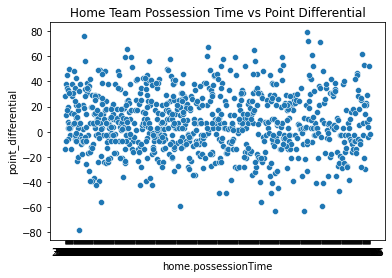

In [21]:


sns.scatterplot(
    data=combined_data, x="home.possessionTime", y="point_differential"
).set_title("Home Team Possession Time vs Point Differential")



From this plot, we can see that there does not seem to be a strong correlation between time on offense and the point differential. This is curious because one would think the longer one is on offense the more chances for point scoring they would have, but we can see no clear positive or negative trend, just noise. We can expect the same result for the away team

Text(0.5, 1.0, 'Home Team Possession Time vs Point Differential')

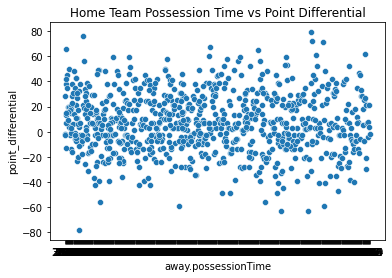

In [22]:
sns.scatterplot(
    data=combined_data, x="away.possessionTime", y="point_differential"
).set_title("Home Team Possession Time vs Point Differential")


And as suspected it is indeed again showing a very neutral relation with point differential and possession time.

Because of these lackluster results, we can conclude that possession time might not be a good indicator of a more successful team, ie which is more likely to win.